<a href="https://colab.research.google.com/github/deyvedalveskl/An-lise-de-Regress-o-com-Python/blob/main/Desafio_Mat%C3%A9ria_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('salario_profissionais_dados.csv')

In [ ]:
df.head()

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [ ]:
df["salary_in_usd"].describe()

,salary_in_usd
count,3755.000000
mean,137570.389880
std,63055.625278
min,5132.000000
25%,95000.000000
50%,135000.000000
75%,175000.000000
max,450000.000000


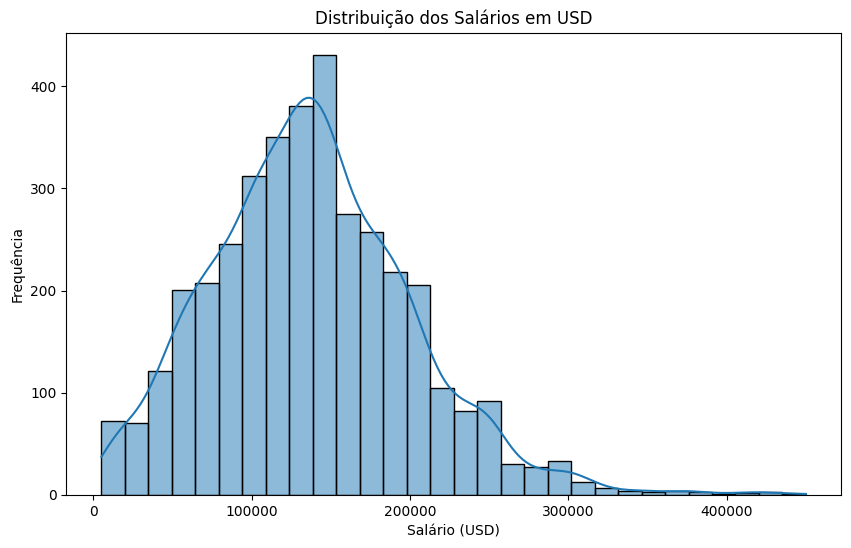

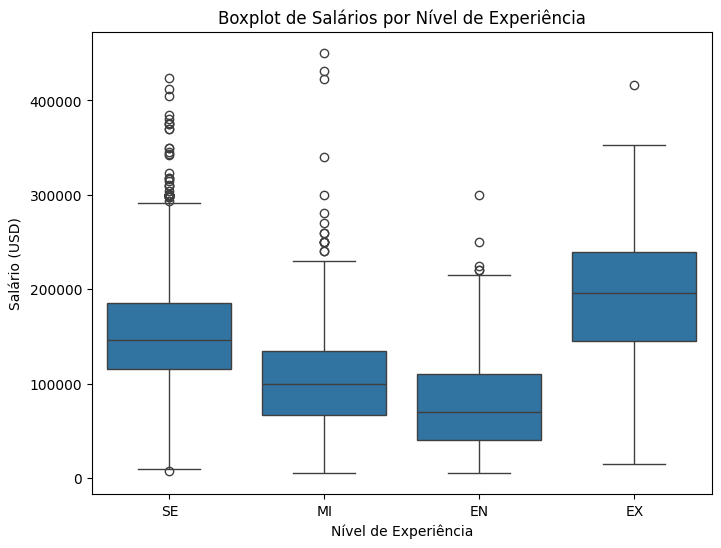

In [ ]:
# Estatísticas descritivas do salário

# Visualização da distribuição dos salários (histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribuição dos Salários em USD')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.show()

# Comparação de salários por nível de experiência (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Boxplot de Salários por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário (USD)')
plt.show()

# Interpretação: Compare a mediana, a dispersão (tamanho da caixa) e a presença de outliers entre os diferentes níveis de experiência.

In [ ]:
df['experience_level'].value_counts()

,count
experience_level,
SE,2516
MI,805
EN,320
EX,114


In [ ]:
df['country'].value_counts().head(10)

,count
country,
United States of America,3004
United Kingdom of Great Britain and Northern Ireland,167
Canada,85
Spain,80
India,71
Germany,48
France,38
Portugal,18
Brazil,18


In [ ]:
df['years_of_experience'].value_counts()

,count
years_of_experience,
8,857
6,838
7,821
4,283
5,272
3,250
1,172
2,148
9,60


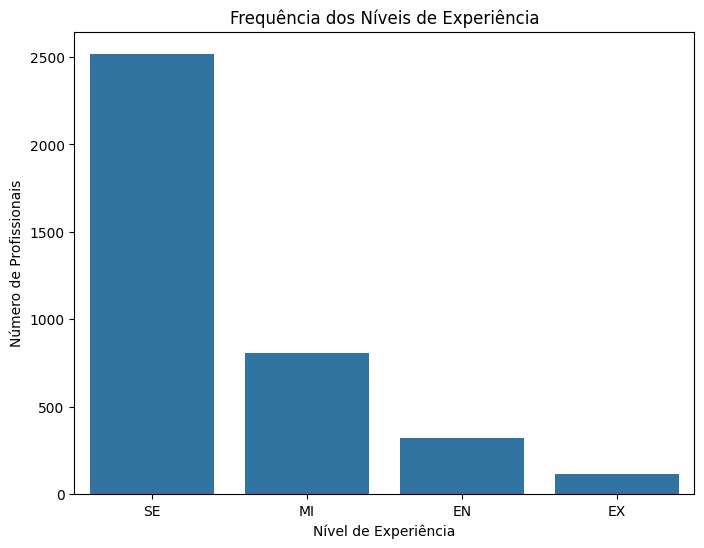

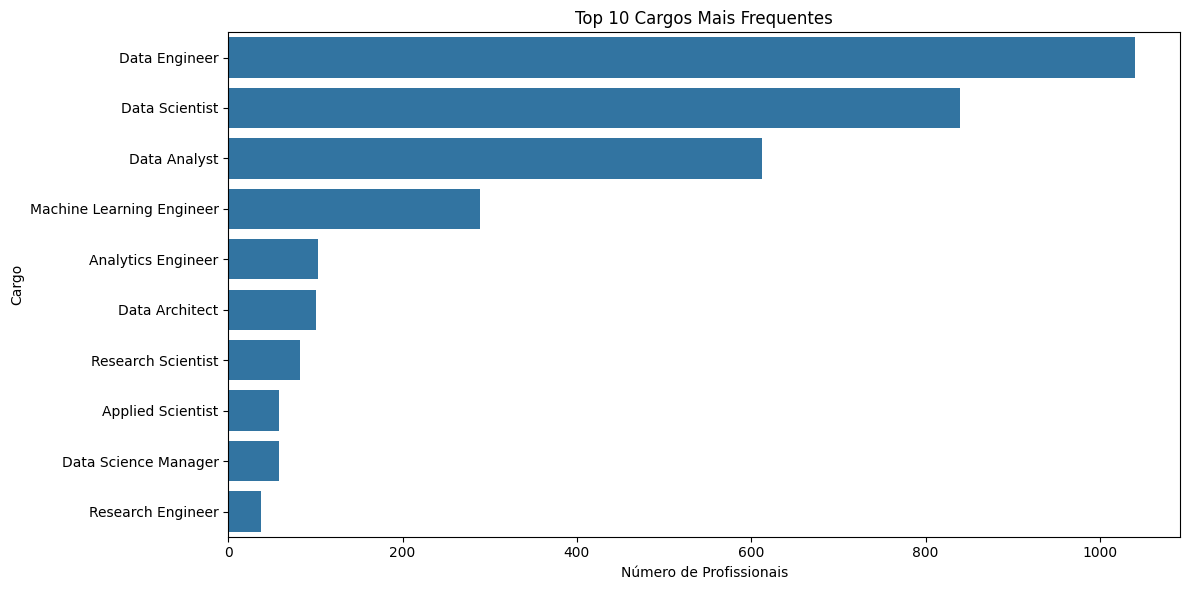

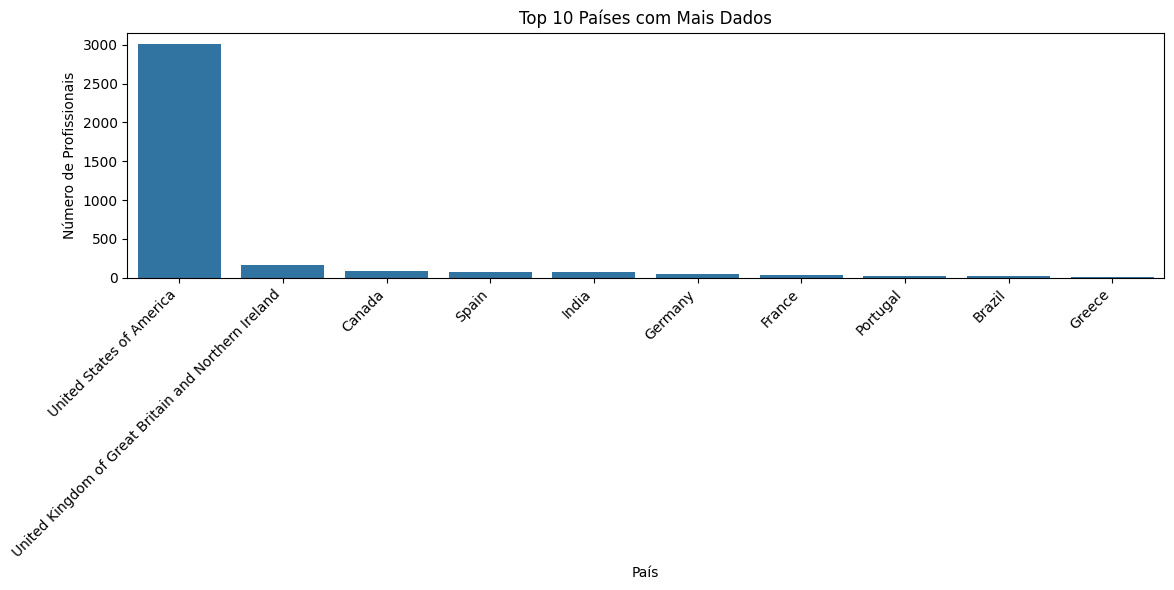

In [ ]:
# Frequência dos níveis de experiência (gráfico de barras)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='experience_level', order=df['experience_level'].value_counts().index)
plt.title('Frequência dos Níveis de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Número de Profissionais')
plt.show()

# Frequência dos 10 cargos mais comuns (gráfico de barras)
top_10_jobs = df['job_title'].value_counts().nlargest(10).index
df_top_10_jobs = df[df['job_title'].isin(top_10_jobs)]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_jobs, y='job_title', order=top_10_jobs)
plt.title('Top 10 Cargos Mais Frequentes')
plt.xlabel('Número de Profissionais')
plt.ylabel('Cargo')
plt.tight_layout()
plt.show()

# Frequência dos 10 países com mais dados (gráfico de barras)
top_10_countries = df['country'].value_counts().nlargest(10).index
df_top_10_countries = df[df['country'].isin(top_10_countries)]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_countries, x='country', order=top_10_countries)
plt.title('Top 10 Países com Mais Dados')
plt.xlabel('País')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Média Salarial por Cargo (Top 10):
job_title
Data Science Tech Lead                375000.000000
Cloud Data Architect                  250000.000000
Data Lead                             212500.000000
Data Analytics Lead                   211254.500000
Principal Data Scientist              198171.125000
Director of Data Science              195140.727273
Principal Data Engineer               192500.000000
Machine Learning Software Engineer    192420.000000
Data Science Manager                  191278.775862
Applied Scientist                     190264.482759
Name: salary_in_usd, dtype: float64


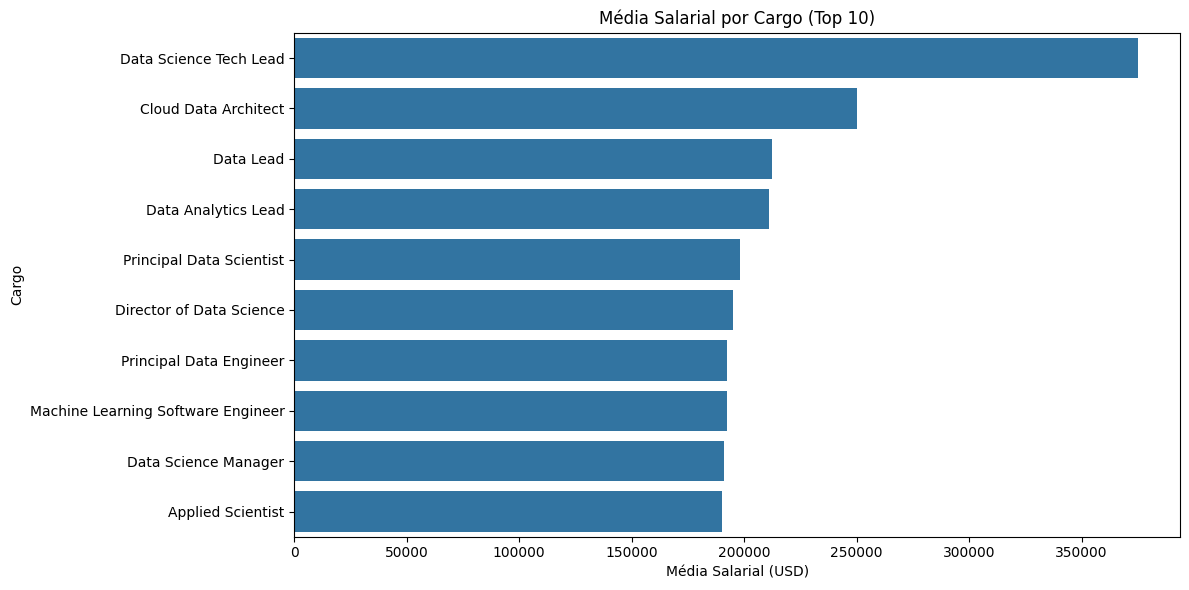


Média Salarial por País (Top 10):
country
Israel                      423834.000000
Malaysia                    200000.000000
Puerto Rico                 166000.000000
United States of America    152822.011651
Canada                      132222.905882
China                       125404.000000
New Zealand                 125000.000000
Bosnia and Herzegovina      120000.000000
Ireland                     114943.428571
Dominican Republic          110000.000000
Name: salary_in_usd, dtype: float64


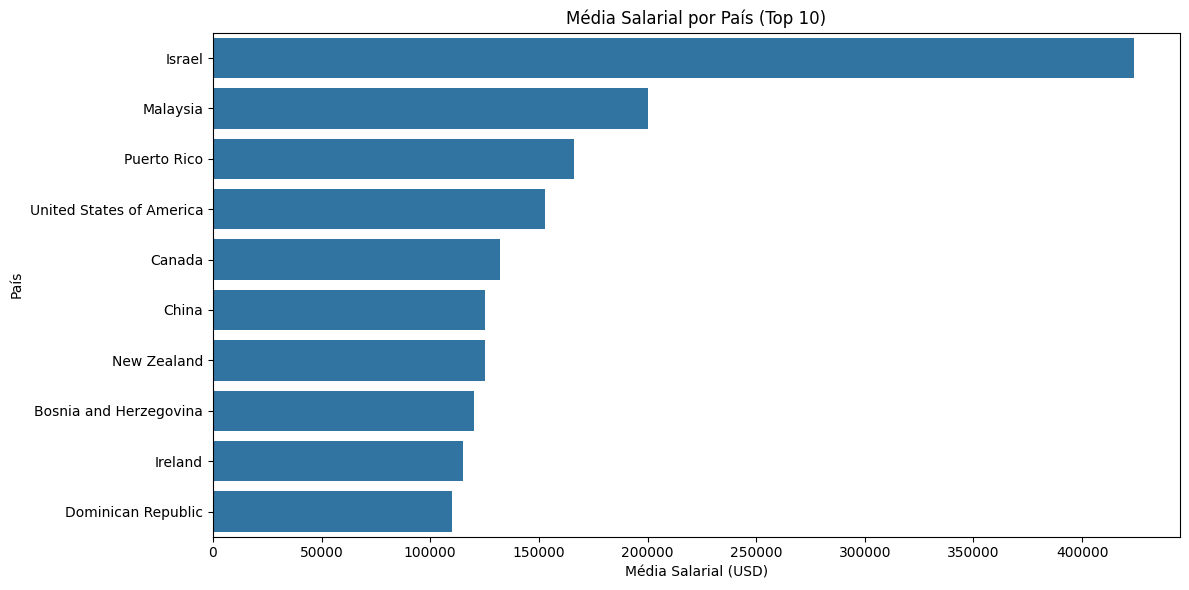

In [ ]:
# Média salarial por cargo
media_salario_cargo = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nMédia Salarial por Cargo (Top 10):")
print(media_salario_cargo.head(10))

# Visualização da média salarial por cargo (top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x=media_salario_cargo.head(10).values, y=media_salario_cargo.head(10).index)
plt.title('Média Salarial por Cargo (Top 10)')
plt.xlabel('Média Salarial (USD)')
plt.ylabel('Cargo')
plt.tight_layout()
plt.show()

# Média salarial por país
media_salario_pais = df.groupby('country')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nMédia Salarial por País (Top 10):")
print(media_salario_pais.head(10))

# Visualização da média salarial por país (top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x=media_salario_pais.head(10).values, y=media_salario_pais.head(10).index)
plt.title('Média Salarial por País (Top 10)')
plt.xlabel('Média Salarial (USD)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

# Interpretação: Quais cargos e países lideram em média salarial? O que isso pode indicar?


Matriz de Correlação:
                     salary_in_usd  work_year  years_of_experience
salary_in_usd             1.000000   0.228290             0.410723
work_year                 0.228290   1.000000             0.178878
years_of_experience       0.410723   0.178878             1.000000


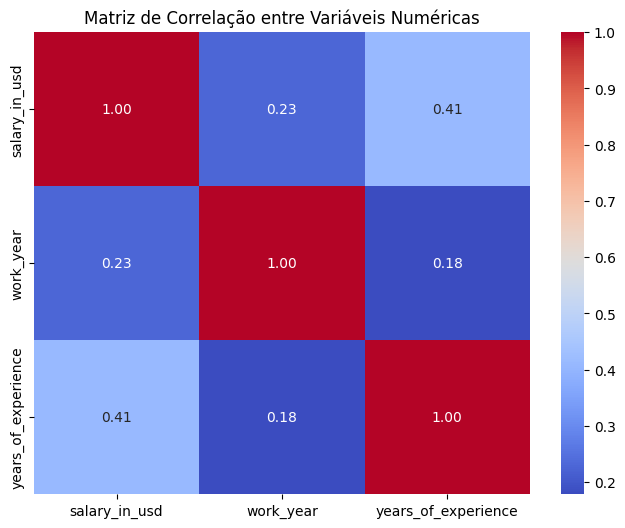

In [ ]:
# Selecionando as colunas numéricas para a correlação
numeric_cols = df[['salary_in_usd', 'work_year', 'years_of_experience']]

# Calculando a matriz de correlação
correlation_matrix = numeric_cols.corr()
print("\nMatriz de Correlação:")
print(correlation_matrix)

# Visualização da matriz de correlação (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Interpretação:
# - Qual a correlação entre 'salary_in_usd' e 'work_year'? Isso sugere que os salários tendem a aumentar ou diminuir com o tempo?
# - Qual a correlação entre 'salary_in_usd' e 'years_of_experience'? Isso indica que mais anos de experiência estão associados a salários mais altos ou mais baixos?
# - A correlação é forte, moderada ou fraca?